# Capstone Project: Modeling - Classification Models

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import os

import json
import random

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing for modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics, linear_model, tree

# Classic ML Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE

import pickle

## Load Dataset

In [3]:
ml_df = pd.read_csv('data/ML_Dataset.csv')

In [4]:
ml_df.head()

,GRP1,GRP2,GRP3,GRP4,REGRESSION_R2,EC50Y,OMIT_CALL,MEASURE_T0_BASE_VALUE,MENISCUS_LENGTH,EC50X,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,0,0,0,0.998637,0.880752,1,1.8924,1.8924,1.7594,...,0.0,0.155963,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
1,1,0,0,0,0.999266,0.778462,1,2.0520,2.0520,1.8737,...,0.0,0.009089,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
2,1,0,0,0,0.997888,0.876217,1,1.7784,1.7784,1.7339,...,0.0,1.111396,0.0,0.0,0.00000,0.0,0.036014,0.0,0.0,0.0
3,1,0,0,0,0.998210,0.881212,1,1.9152,1.9152,1.7677,...,0.0,0.731969,0.0,0.0,0.00000,0.0,0.009445,0.0,0.0,0.0
4,1,0,0,0,0.999372,0.836531,0,2.1660,2.1660,1.8894,...,0.0,0.000000,0.0,0.0,0.05862,0.0,0.000000,0.0,0.0,0.0


## Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ml_df.drop(columns=['OMIT_CALL']), 
                                                    ml_df['OMIT_CALL'], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [6]:
sm = SMOTE(sampling_strategy='not majority', random_state=42, n_jobs=4)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [7]:
ovsmp = (y_train[y_train == 0].shape[0] / y_train.shape[0]) * 100
print('OMIT has been oversampled to %2.2f percent' % ovsmp)

OMIT has been oversampled to 50.00 percent


In [8]:
X_train.iloc[:, :20]

,GRP1,GRP2,GRP3,GRP4,REGRESSION_R2,EC50Y,MEASURE_T0_BASE_VALUE,MENISCUS_LENGTH,EC50X,ESTIMATE_AUC,DRUG_DRY,DRUG_CONTROL,0,1,2,3,4,5,6,7
0,0,0,1,0,0.999823,0.644072,0.387600,0.387600,0.477700,0.116910,1,0,0.000191,0.003963,0.002464,0.0,0.000000,0.0,0.229395,0.0
1,0,0,1,0,0.999476,0.119769,1.288200,1.288200,1.717000,0.143461,0,0,0.027013,0.000000,0.000000,0.0,0.027370,0.0,0.232266,0.0
2,1,0,0,0,0.999880,0.443597,1.607400,1.607400,2.093400,0.488588,0,0,0.011757,0.000000,0.001987,0.0,0.000000,0.0,0.249521,0.0
3,0,0,0,1,0.999084,0.120239,1.311000,1.311000,1.600200,0.164936,0,0,0.154535,0.017759,0.000000,0.0,0.006866,0.0,0.312355,0.0
4,0,0,0,1,0.999852,0.610131,1.755600,1.755600,2.259200,0.710561,0,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.095118,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,1,0,0,0,0.999018,0.584063,1.688493,1.688493,2.284542,0.607868,0,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.005472,0.0
11442,0,1,0,0,0.999874,0.748288,1.562751,1.562751,2.185609,0.633521,0,0,0.004706,0.006055,0.005333,0.0,0.022638,0.0,0.097279,0.0
11443,1,0,0,0,0.999826,0.613948,1.687200,1.687200,2.249800,0.643964,0,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.007737,0.0
11444,0,0,0,0,0.999448,0.418996,1.532856,1.532856,2.126472,0.407581,0,0,0.002845,0.000000,0.000000,0.0,0.000000,0.0,0.020258,0.0


_______


# Classification Models

## Baseline Model

Since the class imbalance is roughy 10% for class 1 and 90% for class 2, we will use a All-positive baseline model which should have a approximate overall accuracy of 90%. 

In [9]:
# This will capture all model metrics
all_metrics = pd.DataFrame()

In [10]:
baseline_pred_train = [1] * len(y_train)
baseline_pred_test = [1] * len(y_test)

In [11]:
print("Baseline Model: \t Test Set Accuracy = %2.2f" % accuracy_score(y_test, baseline_pred_test))

Baseline Model: 	 Test Set Accuracy = 0.91


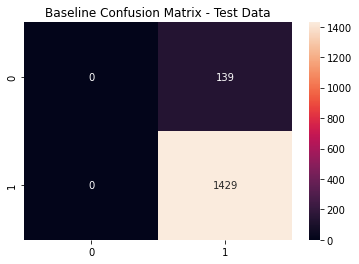

In [12]:
metrics.accuracy_score(y_test, baseline_pred_test)
baseline_cfm = metrics.confusion_matrix(y_test, baseline_pred_test)
sns.heatmap(baseline_cfm, annot=True, fmt='d')
plt.title('Baseline Confusion Matrix - Test Data')
plt.show()

In [13]:
baseline_met = pd.DataFrame(metrics.classification_report(y_test, baseline_pred_test, output_dict=True)).transpose()
baseline_met['model'] = 'Baseline Model'
all_metrics = pd.concat([all_metrics, baseline_met.reset_index()], axis=0)

baseline_met

,precision,recall,f1-score,support,model
0,0.000000,0.000000,0.000000,139.000000,Baseline Model
1,0.911352,1.000000,0.953620,1429.000000,Baseline Model
accuracy,0.911352,0.911352,0.911352,0.911352,Baseline Model
macro avg,0.455676,0.500000,0.476810,1568.000000,Baseline Model
weighted avg,0.830563,0.911352,0.869084,1568.000000,Baseline Model


_______


## Logistic Regression

Cost = 0.01 	 Testing Accuracy = 0.83 	     Training Accuracy = 0.87
Cost = 0.10 	 Testing Accuracy = 0.87 	     Training Accuracy = 0.92
Cost = 0.20 	 Testing Accuracy = 0.88 	     Training Accuracy = 0.94
Cost = 0.50 	 Testing Accuracy = 0.89 	     Training Accuracy = 0.95
Cost = 0.80 	 Testing Accuracy = 0.90 	     Training Accuracy = 0.96
Cost = 1.00 	 Testing Accuracy = 0.90 	     Training Accuracy = 0.96
Cost = 5.00 	 Testing Accuracy = 0.90 	     Training Accuracy = 0.98
Cost = 10.00 	 Testing Accuracy = 0.90 	     Training Accuracy = 0.99
Cost = 20.00 	 Testing Accuracy = 0.91 	     Training Accuracy = 0.99
Cost = 50.00 	 Testing Accuracy = 0.91 	     Training Accuracy = 0.99


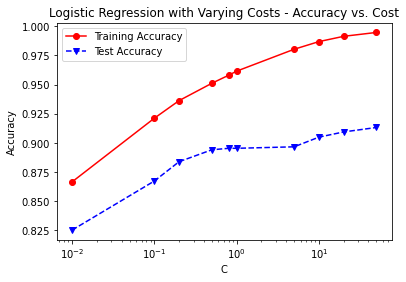

In [14]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []

for param in C:
    tlr = linear_model.LogisticRegression(penalty='l2', 
                                          solver='lbfgs',
                                          max_iter=2000,
                                          C=param, random_state=42)
    tlr.fit(X_train, y_train)
    tlr_pred_train = tlr.predict(X_train)
    tlr_pred_test = tlr.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, tlr_pred_train))
    LRtestAcc.append(accuracy_score(y_test, tlr_pred_test))
    print('Cost = %2.2f \t Testing Accuracy = %2.2f \t \
    Training Accuracy = %2.2f' % (param,accuracy_score(y_test,tlr_pred_test),
                               accuracy_score(y_train,tlr_pred_train)))
    
fig, ax = plt.subplots()
ax.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax.legend(['Training Accuracy','Test Accuracy'])
plt.title('Logistic Regression with Varying Costs - Accuracy vs. Cost')
ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_ylabel('Accuracy')
plt.show()

In [15]:
# Best hyperparameters
tlr = linear_model.LogisticRegression(penalty='l2', 
                                      solver='lbfgs',
                                      max_iter=2000,
                                      C=20, random_state=42)
tlr.fit(X_train, y_train)
tlr_pred_test = tlr.predict(X_test)
tlr_pred_testp = tlr.predict_proba(X_test)

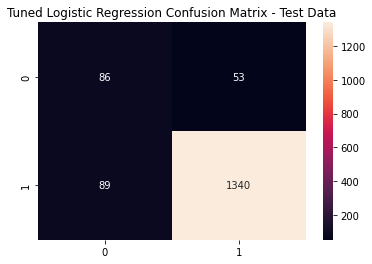

In [16]:
metrics.accuracy_score(y_test, tlr_pred_test)
tlr_cfm = metrics.confusion_matrix(y_test, tlr_pred_test)
sns.heatmap(tlr_cfm, annot=True, fmt='d')
plt.title('Tuned Logistic Regression Confusion Matrix - Test Data')
plt.show()

In [17]:
tlr_met = pd.DataFrame(metrics.classification_report(y_test, tlr_pred_test, 
                                                          output_dict=True)).transpose()
tlr_met['model'] = 'Logistic Regression'
all_metrics = pd.concat([all_metrics, tlr_met.reset_index()], axis=0)
tlr_met

,precision,recall,f1-score,support,model
0,0.491429,0.618705,0.547771,139.000000,Logistic Regression
1,0.961953,0.937719,0.949681,1429.000000,Logistic Regression
accuracy,0.909439,0.909439,0.909439,0.909439,Logistic Regression
macro avg,0.726691,0.778212,0.748726,1568.000000,Logistic Regression
weighted avg,0.920242,0.909439,0.914053,1568.000000,Logistic Regression


### Logistic Regression - Threshold Tuning

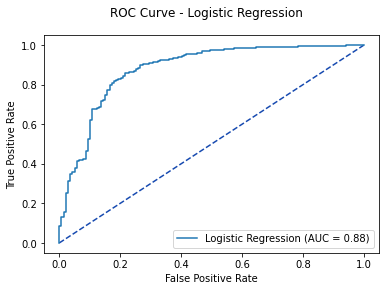

Optimal Threshold 0.908043


In [18]:
# Optimal Model predictions
tlr_pred = tlr_pred_testp[:, 1]

tlr_roc = metrics.roc_curve(y_test, tlr_pred)
tlr_auc = metrics.auc(tlr_roc[0], tlr_roc[1])
tlr_plot = metrics.RocCurveDisplay(fpr=tlr_roc[0], tpr=tlr_roc[1], 
                                   roc_auc=tlr_auc, estimator_name='Logistic Regression')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
tlr_plot.plot(ax)
plt.show()

# Optimal Threshold value
tlr_opt = tlr_roc[2][np.argmax(tlr_roc[1] - tlr_roc[0])]

print('Optimal Threshold %f' % tlr_opt)

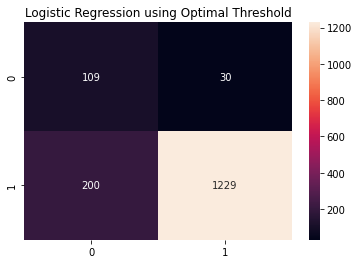

In [19]:
tlr_cfm = metrics.confusion_matrix(y_test, (tlr_pred >= tlr_opt).astype(int))
sns.heatmap(tlr_cfm, annot=True, fmt='g')
plt.title('Logistic Regression using Optimal Threshold')
plt.show()

In [20]:
pd.DataFrame(metrics.classification_report(y_test, 
                                           (tlr_pred >= tlr_opt).astype(int), 
                                           output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.352751,0.784173,0.486607,139.000000
1,0.976172,0.860042,0.914435,1429.000000
accuracy,0.853316,0.853316,0.853316,0.853316
macro avg,0.664461,0.822107,0.700521,1568.000000
weighted avg,0.920907,0.853316,0.876508,1568.000000




_______
 
## Support Vector Machines

Cost = 0.01 	 Testing Accuracy = 0.48 	     Training Accuracy = 0.61
Cost = 0.10 	 Testing Accuracy = 0.74 	     Training Accuracy = 0.72
Cost = 0.20 	 Testing Accuracy = 0.76 	     Training Accuracy = 0.76
Cost = 0.50 	 Testing Accuracy = 0.78 	     Training Accuracy = 0.79
Cost = 0.80 	 Testing Accuracy = 0.79 	     Training Accuracy = 0.81
Cost = 1.00 	 Testing Accuracy = 0.80 	     Training Accuracy = 0.82
Cost = 5.00 	 Testing Accuracy = 0.84 	     Training Accuracy = 0.89
Cost = 10.00 	 Testing Accuracy = 0.86 	     Training Accuracy = 0.91
Cost = 20.00 	 Testing Accuracy = 0.88 	     Training Accuracy = 0.93
Cost = 50.00 	 Testing Accuracy = 0.90 	     Training Accuracy = 0.95


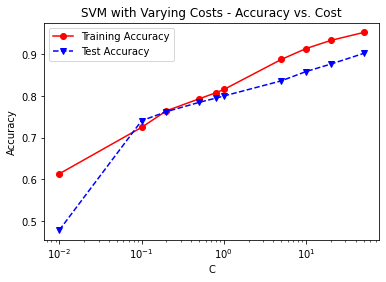

In [21]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
svm_trainAcc = []
svm_testAcc = []

for param in C:
    svm = SVC(C=param,kernel='rbf', gamma = 'auto', random_state=42)
    svm.fit(X_train, y_train)
    svm_pred_train = svm.predict(X_train)
    svm_pred_test = svm.predict(X_test)
    svm_trainAcc.append(accuracy_score(y_train, svm_pred_train))
    svm_testAcc.append(accuracy_score(y_test, svm_pred_test))
    print('Cost = %2.2f \t Testing Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (param,accuracy_score(y_test,svm_pred_test),
                               accuracy_score(y_train,svm_pred_train)))    

fig, ax = plt.subplots()
ax.plot(C, svm_trainAcc, 'ro-', C, svm_testAcc,'bv--')
ax.legend(['Training Accuracy','Test Accuracy'])
plt.title('SVM with Varying Costs - Accuracy vs. Cost')
ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_ylabel('Accuracy')
plt.show()

In [22]:
# Best hyperparameters
svm = SVC(C=50, kernel='rbf', gamma = 'auto', random_state=42, probability=True)
svm.fit(X_train, y_train)
svm_pred_test = svm.predict_proba(X_test)

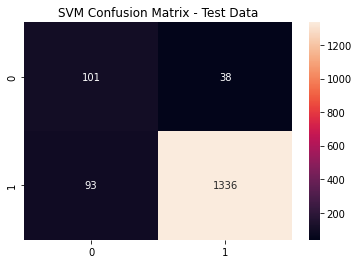

In [23]:
# Predicted Classes
svm_pred = (svm_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, svm_pred)
svm_cfm = metrics.confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cfm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix - Test Data')
plt.show()

In [24]:
svm_met = pd.DataFrame(metrics.classification_report(y_test, svm_pred, 
                                                     output_dict=True)).transpose()
svm_met['model'] = 'SVM'
all_metrics = pd.concat([all_metrics, svm_met.reset_index()], axis=0)
svm_met

,precision,recall,f1-score,support,model
0,0.520619,0.726619,0.606607,139.000000,SVM
1,0.972344,0.934920,0.953264,1429.000000,SVM
accuracy,0.916454,0.916454,0.916454,0.916454,SVM
macro avg,0.746481,0.830769,0.779935,1568.000000,SVM
weighted avg,0.932299,0.916454,0.922534,1568.000000,SVM


### SVM - Threshold Tuning

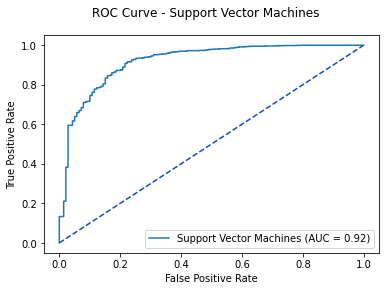

Optimal Threshold 0.588288


In [25]:
# Optimal Model predictions
svm_roc = metrics.roc_curve(y_test, svm_pred_test[:, 1])
svm_auc = metrics.auc(svm_roc[0], svm_roc[1])
svm_plot = metrics.RocCurveDisplay(fpr=svm_roc[0], tpr=svm_roc[1], 
                                   roc_auc=svm_auc, estimator_name='Support Vector Machines')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Support Vector Machines')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
svm_plot.plot(ax)
plt.show()

# Optimal Threshold value
svm_opt = svm_roc[2][np.argmax(svm_roc[1] - svm_roc[0])]

print('Optimal Threshold %f' % svm_opt)

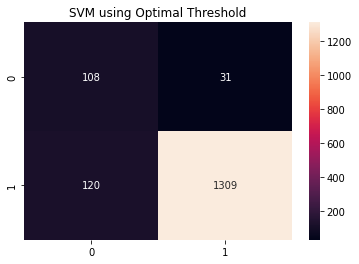

In [26]:
svm_cfm = metrics.confusion_matrix(y_test, (svm_pred_test[:, 1] >= svm_opt).astype(int))
sns.heatmap(svm_cfm, annot=True, fmt='g')
plt.title('SVM using Optimal Threshold')
plt.show()

In [27]:
pd.DataFrame(metrics.classification_report(y_test, 
                                           (svm_pred_test[:, 1] >= svm_opt).astype(int), 
                                           output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.473684,0.776978,0.588556,139.000000
1,0.976866,0.916025,0.945468,1429.000000
accuracy,0.903699,0.903699,0.903699,0.903699
macro avg,0.725275,0.846502,0.767012,1568.000000
weighted avg,0.932260,0.903699,0.913828,1568.000000



_________

## Linear Discriminant Analysis

No hyperparameter tuning for LDA

In [28]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)
lda_cv = cross_val_score(lda_model, X_train, y_train)

print('LDA 5-fold Cross Validation Average %f' % lda_cv.mean())

LDA 5-fold Cross Validation Average 0.926175


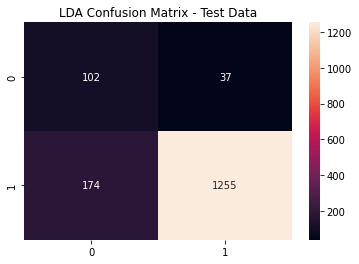

In [29]:
lda_pred_test = lda_model.predict_proba(X_test)

# Predicted Classes
lda_pred = (lda_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, lda_pred)
lda_cfm = metrics.confusion_matrix(y_test, lda_pred)
sns.heatmap(lda_cfm, annot=True, fmt='d')
plt.title('LDA Confusion Matrix - Test Data')
plt.show()

In [30]:
lda_met = pd.DataFrame(metrics.classification_report(y_test, lda_pred, 
                                                     output_dict=True)).transpose()
lda_met['model'] = 'LDA'
all_metrics = pd.concat([all_metrics, lda_met.reset_index()], axis=0)
lda_met

,precision,recall,f1-score,support,model
0,0.369565,0.733813,0.491566,139.000000,LDA
1,0.971362,0.878237,0.922455,1429.000000,LDA
accuracy,0.865434,0.865434,0.865434,0.865434,LDA
macro avg,0.670464,0.806025,0.707011,1568.000000,LDA
weighted avg,0.918014,0.865434,0.884258,1568.000000,LDA


### LDA - Threshold Tuning

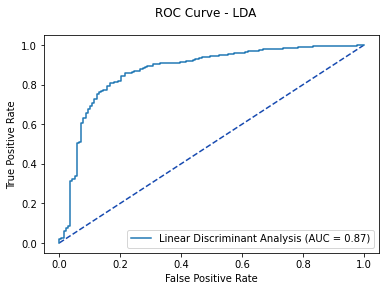

Optimal Threshold 0.665024


In [31]:
lda_roc = metrics.roc_curve(y_test, lda_pred_test[:, 1])
lda_auc = metrics.auc(lda_roc[0], lda_roc[1])
lda_plot = metrics.RocCurveDisplay(fpr=lda_roc[0], tpr=lda_roc[1], 
roc_auc=lda_auc, estimator_name='Linear Discriminant Analysis')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - LDA')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
lda_plot.plot(ax)
plt.show()

# Optimal Threshold value
lda_opt = lda_roc[2][np.argmax(lda_roc[1] - lda_roc[0])]

print('Optimal Threshold %f' % lda_opt)

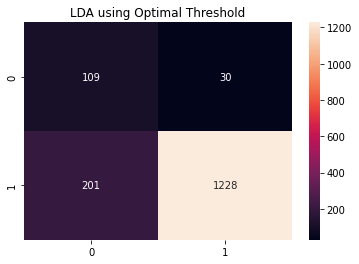

In [32]:
lda_cfm = metrics.confusion_matrix(y_test, (lda_pred_test[:, 1] >= lda_opt).astype(int))
sns.heatmap(lda_cfm, annot=True, fmt='g')
plt.title('LDA using Optimal Threshold')
plt.show()

In [33]:
pd.DataFrame(metrics.classification_report(y_test, 
                                           (lda_pred_test[:, 1] >= lda_opt).astype(int), 
                                           output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.351613,0.784173,0.485523,139.000000
1,0.976153,0.859342,0.914031,1429.000000
accuracy,0.852679,0.852679,0.852679,0.852679
macro avg,0.663883,0.821757,0.699777,1568.000000
weighted avg,0.920788,0.852679,0.876044,1568.000000


_______

## Quadratic Discriminant Analysis

No hyperparameters to tune

In [34]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
qda_cv = cross_val_score(qda_model, X_train, y_train)

print('QDA 5-fold Cross Validation Average %f' % qda_cv.mean())

QDA 5-fold Cross Validation Average 0.999913


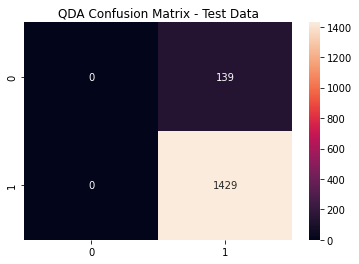

In [35]:
qda_pred_test = qda_model.predict_proba(X_test)

# Predicted Classes
qda_pred = (qda_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, qda_pred)
qda_cfm = metrics.confusion_matrix(y_test, qda_pred)
sns.heatmap(qda_cfm, annot=True, fmt='d')
plt.title('QDA Confusion Matrix - Test Data')
plt.show()

In [36]:
qda_met = pd.DataFrame(metrics.classification_report(y_test, qda_pred, 
                                                     output_dict=True)).transpose()
qda_met['model'] = 'QDA'
all_metrics = pd.concat([all_metrics, qda_met.reset_index()], axis=0)
qda_met

,precision,recall,f1-score,support,model
0,0.000000,0.000000,0.000000,139.000000,QDA
1,0.911352,1.000000,0.953620,1429.000000,QDA
accuracy,0.911352,0.911352,0.911352,0.911352,QDA
macro avg,0.455676,0.500000,0.476810,1568.000000,QDA
weighted avg,0.830563,0.911352,0.869084,1568.000000,QDA


QDA model is not able to predict the negative (0) class and performs exactly as the Baseline model

________

## Naive Bayes

No hyperparameters to tune

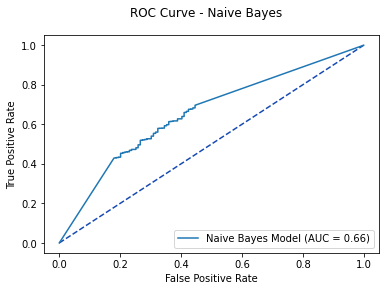

Optimal Threshold 0.000000


In [37]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
nb_pred_test = nb_model.predict_proba(X_test)

# Class predictions
nb_pred = (nb_pred_test[:, 1] >= 0.5).astype('int')

nb_roc = metrics.roc_curve(y_test, nb_pred_test[:, 1])
nb_auc = metrics.auc(nb_roc[0], nb_roc[1])
nb_plot = metrics.RocCurveDisplay(fpr=nb_roc[0], tpr=nb_roc[1], 
                                  roc_auc=nb_auc, estimator_name='Naive Bayes Model')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Naive Bayes')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
nb_plot.plot(ax)
plt.show()

# Optimal Threshold value
nb_opt = nb_roc[2][np.argmax(nb_roc[1] - nb_roc[0])]
print('Optimal Threshold %f' % nb_opt)

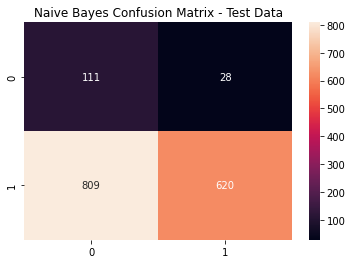

In [38]:
metrics.accuracy_score(y_test, nb_pred)
nb_cfm = metrics.confusion_matrix(y_test, nb_pred)
sns.heatmap(nb_cfm, annot=True, fmt='d')
plt.title('Naive Bayes Confusion Matrix - Test Data')
plt.show()

In [39]:
nb_met = pd.DataFrame(metrics.classification_report(y_test, nb_pred, 
                                                     output_dict=True)).transpose()
nb_met['model'] = 'Naive Bayes'
all_metrics = pd.concat([all_metrics, nb_met.reset_index()], axis=0)
nb_met

,precision,recall,f1-score,support,model
0,0.120652,0.798561,0.209632,139.000000,Naive Bayes
1,0.956790,0.433870,0.597015,1429.000000,Naive Bayes
accuracy,0.466199,0.466199,0.466199,0.466199,Naive Bayes
macro avg,0.538721,0.616215,0.403323,1568.000000,Naive Bayes
weighted avg,0.882668,0.466199,0.562674,1568.000000,Naive Bayes


______

## Decision Trees

Depth =  3 	 Testing Accuracy = 0.85 	     Training Accuracy = 0.76
Depth =  4 	 Testing Accuracy = 0.72 	     Training Accuracy = 0.78
Depth =  5 	 Testing Accuracy = 0.74 	     Training Accuracy = 0.83
Depth =  6 	 Testing Accuracy = 0.80 	     Training Accuracy = 0.87
Depth =  7 	 Testing Accuracy = 0.80 	     Training Accuracy = 0.90
Depth =  8 	 Testing Accuracy = 0.84 	     Training Accuracy = 0.92
Depth =  9 	 Testing Accuracy = 0.84 	     Training Accuracy = 0.95
Depth = 10 	 Testing Accuracy = 0.85 	     Training Accuracy = 0.97
Depth = 11 	 Testing Accuracy = 0.85 	     Training Accuracy = 0.98
Depth = 12 	 Testing Accuracy = 0.85 	     Training Accuracy = 0.98
Depth = 13 	 Testing Accuracy = 0.87 	     Training Accuracy = 0.99
Depth = 14 	 Testing Accuracy = 0.86 	     Training Accuracy = 0.99
Depth = 15 	 Testing Accuracy = 0.86 	     Training Accuracy = 0.99


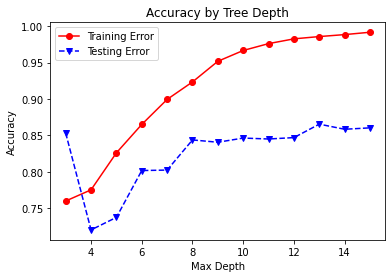

In [40]:
accuracy_depth = []

# Loop through depth ranges from 3 to 15
for depth in range(3, 16):
    dt = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt = dt.fit(X_train,y_train)
    dt_pred = dt.predict(X_test)
    dt_train_pred = dt.predict(X_train)
    accuracy_depth.append({'depth':depth,
                           'test_accuracy':accuracy_score(y_test, dt_pred),
                           'train_accuracy':accuracy_score(y_train, dt_train_pred)})
    print('Depth = %2.0f \t Testing Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (depth,accuracy_score(y_test, dt_pred),
                               accuracy_score(y_train, dt_train_pred)))

dt_acc_df = pd.DataFrame(accuracy_depth)
dt_acc_df.index = dt_acc_df['depth']

fig, ax=plt.subplots()

ax.plot(dt_acc_df.depth, dt_acc_df.train_accuracy,'ro-',label='Training Error')
ax.plot(dt_acc_df.depth, dt_acc_df.test_accuracy,'bv--',label='Testing Error')
plt.title('Accuracy by Tree Depth')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# Optimal model hyperparameters
dt = tree.DecisionTreeClassifier(max_depth=14, random_state=42)
dt.fit(X_train, y_train)

dt_pred_test = dt.predict_proba(X_test)

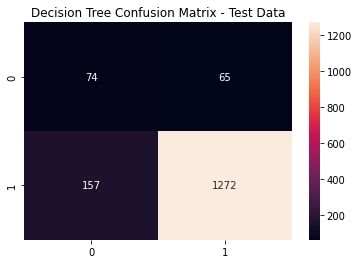

In [42]:
# Predicted Classes
dt_pred = (dt_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, dt_pred)
dt_cfm = metrics.confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cfm, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix - Test Data')
plt.show()

In [43]:
dt_met = pd.DataFrame(metrics.classification_report(y_test, dt_pred, 
                                                    output_dict=True)).transpose()
dt_met['model'] = 'Decision Trees'
all_metrics = pd.concat([all_metrics, dt_met.reset_index()], axis=0)
dt_met

,precision,recall,f1-score,support,model
0,0.320346,0.532374,0.400000,139.000000,Decision Trees
1,0.951384,0.890133,0.919740,1429.000000,Decision Trees
accuracy,0.858418,0.858418,0.858418,0.858418,Decision Trees
macro avg,0.635865,0.711254,0.659870,1568.000000,Decision Trees
weighted avg,0.895444,0.858418,0.873666,1568.000000,Decision Trees


### Decision Tree - Threshold Tuning

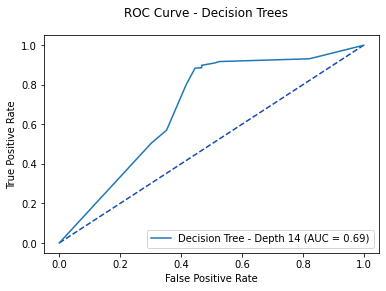

Optimal Threshold 0.987365


In [44]:
dt_roc = metrics.roc_curve(y_test, dt_pred_test[:, 1])
dt_auc = metrics.auc(dt_roc[0], dt_roc[1])
dt_plot = metrics.RocCurveDisplay(fpr=dt_roc[0], tpr=dt_roc[1], 
                                  roc_auc=dt_auc, estimator_name='Decision Tree - Depth 14')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Decision Trees')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
dt_plot.plot(ax)
plt.show()

# Optimal Threshold value
dt_opt = dt_roc[2][np.argmax(dt_roc[1] - dt_roc[0])]

print('Optimal Threshold %f' % dt_opt)

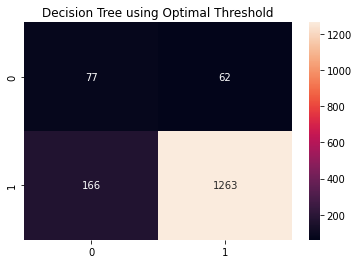

In [45]:
dt_cfm = metrics.confusion_matrix(y_test, (dt_pred_test[:, 1] >= dt_opt).astype(int))
sns.heatmap(dt_cfm, annot=True, fmt='g')
plt.title('Decision Tree using Optimal Threshold')
plt.show()

In [46]:
pd.DataFrame(metrics.classification_report(y_test, 
                                           (dt_pred_test[:, 1] >= dt_opt).astype(int), 
                                           output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.316872,0.553957,0.403141,139.000000
1,0.953208,0.883835,0.917211,1429.000000
accuracy,0.854592,0.854592,0.854592,0.854592
macro avg,0.635040,0.718896,0.660176,1568.000000
weighted avg,0.896798,0.854592,0.871640,1568.000000


_______

## Random Forest

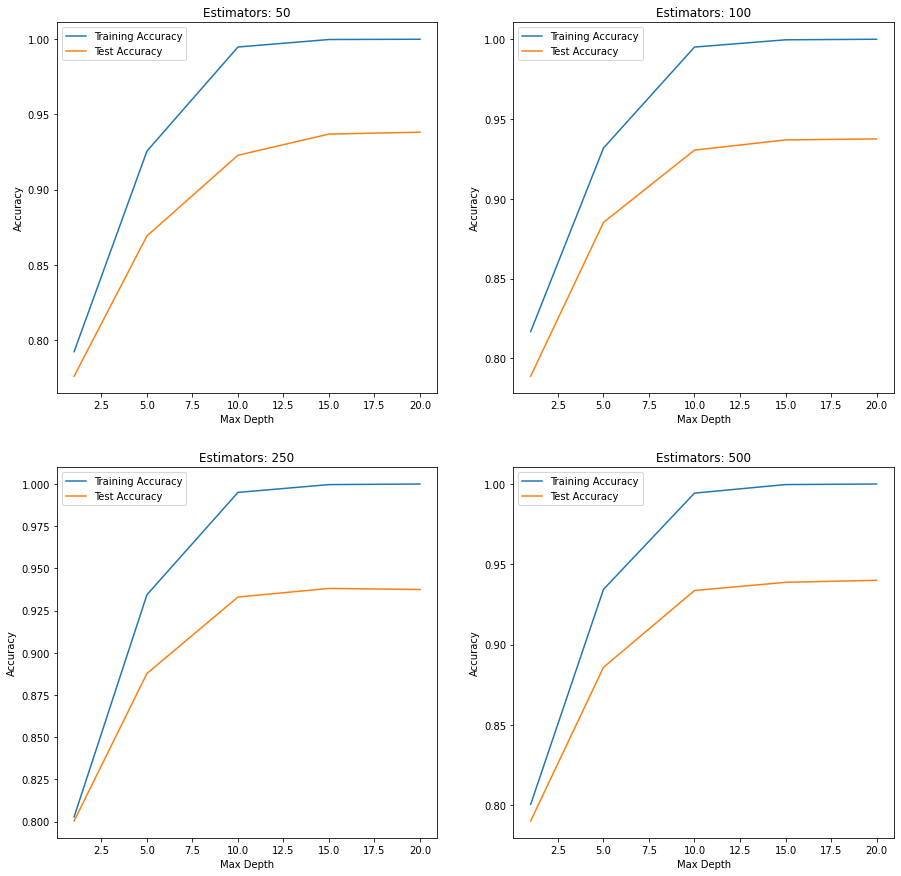

In [47]:
estimators = [50, 100, 250, 500]
depths = [1, 5, 10, 15, 20]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes = ax.flatten()
k = 0

rf_scores = {}

for i in estimators:

    train_scores = []
    test_scores = []
    for j in depths:
        rf_model = RandomForestClassifier(n_estimators=i, 
                                          max_depth=j, 
                                          random_state=42).fit(X_train, y_train)
        train_scores.append(metrics.accuracy_score(y_train, rf_model.predict(X_train)))
        test_scores.append(metrics.accuracy_score(y_test, rf_model.predict(X_test)))
    
    rf_scores[i] = {'train': train_scores, 'test': test_scores}
  
    sns.lineplot(x=depths, y=train_scores, label='Training Accuracy', ax=axes[k])
    sns.lineplot(x=depths, y=test_scores, label='Test Accuracy', ax=axes[k])
    axes[k].set_title('Estimators: %d' % i)
    axes[k].set_xlabel('Max Depth')
    axes[k].set_ylabel('Accuracy')
    k += 1 

In [48]:
rf_acc_df = None

for i in estimators:
    if rf_acc_df is None:
        rf_acc_df = pd.DataFrame(rf_scores[i])
        rf_acc_df['Estimators'] = i
        rf_acc_df['Max Depth'] = depths
    else:
        df = pd.DataFrame(rf_scores[i])
        df['Estimators'] = i
        df['Max Depth'] = depths
        
        rf_acc_df = pd.concat([rf_acc_df, df], axis=0)

In [49]:
rf_acc_df

,train,test,Estimators,Max Depth
0,0.792417,0.776148,50,1
1,0.925564,0.869260,50,5
2,0.994671,0.922832,50,10
3,0.999651,0.936862,50,15
4,0.999825,0.938138,50,20
0,0.816792,0.788903,100,1
1,0.931767,0.885204,100,5
2,0.995020,0.930485,100,10
3,0.999563,0.936862,100,15
4,0.999913,0.937500,100,20


In [50]:
rf_model = RandomForestClassifier(n_estimators=500, 
                                  max_depth=20, 
                                  random_state=42).fit(X_train, y_train)
rf_pred_test = rf_model.predict_proba(X_test)

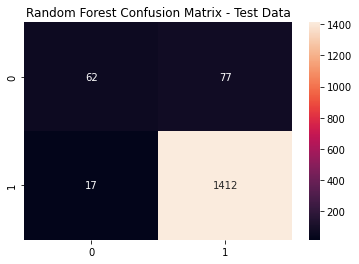

In [51]:
# Predicted Classes
rf_pred = (rf_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, rf_pred)
rf_cfm = metrics.confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cfm, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix - Test Data')
plt.show()

In [52]:
rf_met = pd.DataFrame(metrics.classification_report(y_test, rf_pred, 
                                                    output_dict=True)).transpose()
rf_met['model'] = 'Random Forest'
all_metrics = pd.concat([all_metrics, rf_met.reset_index()], axis=0)
rf_met

,precision,recall,f1-score,support,model
0,0.784810,0.446043,0.568807,139.000000,Random Forest
1,0.948287,0.988104,0.967786,1429.000000,Random Forest
accuracy,0.940051,0.940051,0.940051,0.940051,Random Forest
macro avg,0.866549,0.717073,0.768297,1568.000000,Random Forest
weighted avg,0.933796,0.940051,0.932417,1568.000000,Random Forest


### Random Forest - Threshold Tuning

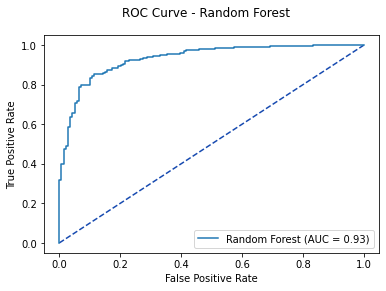

Optimal Threshold 0.753126


In [53]:
rf_roc = metrics.roc_curve(y_test, rf_pred_test[:, 1])
rf_auc = metrics.auc(rf_roc[0], rf_roc[1])
rf_plot = metrics.RocCurveDisplay(fpr=rf_roc[0], tpr=rf_roc[1], 
                                  roc_auc=rf_auc, estimator_name='Random Forest')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Random Forest')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
rf_plot.plot(ax)
plt.show()

# Optimal Threshold value
rf_opt = rf_roc[2][np.argmax(rf_roc[1] - rf_roc[0])]

print('Optimal Threshold %f' % rf_opt)

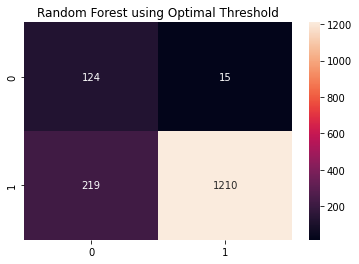

In [54]:
rf_cfm = metrics.confusion_matrix(y_test, (rf_pred_test[:, 1] >= rf_opt).astype(int))
sns.heatmap(rf_cfm, annot=True, fmt='g')
plt.title('Random Forest using Optimal Threshold')
plt.show()

In [55]:
pd.DataFrame(metrics.classification_report(y_test, 
                                           (rf_pred_test[:, 1] >= rf_opt).astype(int), 
                                           output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.361516,0.892086,0.514523,139.000000
1,0.987755,0.846746,0.911831,1429.000000
accuracy,0.850765,0.850765,0.850765,0.850765
macro avg,0.674636,0.869416,0.713177,1568.000000
weighted avg,0.932240,0.850765,0.876611,1568.000000


_______

## XGBoost Model

We opted for XGBoost instead of GBM due to the extremely slow training time for GBM

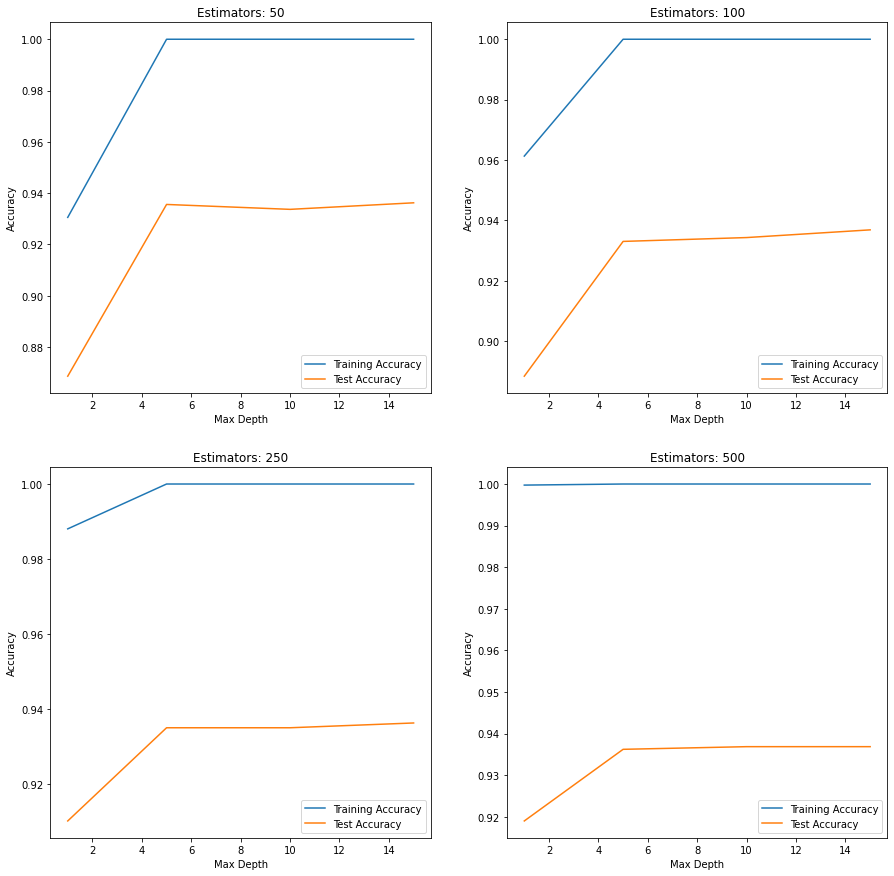

In [56]:
estimators = [50, 100, 250, 500]
depths = [1, 5, 10, 15]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes = ax.flatten()
k = 0

gb_scores = {}

for i in estimators:

    train_scores = []
    test_scores = []
    for j in depths:
        xgb_model = xgb.XGBClassifier(n_estimators=i, 
                                      learning_rate=1.0, 
                                      max_depth=j, 
                                      random_state=42, 
                                      n_jobs=4).fit(X_train, y_train)
        
        train_scores.append(metrics.accuracy_score(y_train, xgb_model.predict(X_train)))
        test_scores.append(metrics.accuracy_score(y_test, xgb_model.predict(X_test)))
        
    gb_scores[i] = {'train': train_scores, 'test': test_scores}
  
    sns.lineplot(x=depths, y=train_scores, label='Training Accuracy', ax=axes[k])
    sns.lineplot(x=depths, y=test_scores, label='Test Accuracy', ax=axes[k])
    axes[k].set_title('Estimators: %d' % i)
    axes[k].set_xlabel('Max Depth')
    axes[k].set_ylabel('Accuracy')
    k += 1 

In [57]:
xgb_acc_df = None

for i in estimators:
    if xgb_acc_df is None:
        xgb_acc_df = pd.DataFrame(gb_scores[i])
        xgb_acc_df['Estimators'] = i
        xgb_acc_df['Max Depth'] = depths
    else:
        df = pd.DataFrame(gb_scores[i])
        df['Estimators'] = i
        df['Max Depth'] = depths
        
        xgb_acc_df = pd.concat([xgb_acc_df, df], axis=0)

In [58]:
xgb_acc_df

,train,test,Estimators,Max Depth
0,0.930543,0.868622,50,1
1,1.000000,0.935587,50,5
2,1.000000,0.933673,50,10
3,1.000000,0.936224,50,15
0,0.961297,0.888393,100,1
1,1.000000,0.933036,100,5
2,1.000000,0.934311,100,10
3,1.000000,0.936862,100,15
0,0.988031,0.910077,250,1
1,1.000000,0.934949,250,5


In [59]:
# best hyperparameters
xgb_model = xgb.XGBClassifier(n_estimators=50, 
                              learning_rate=1.0,
                              max_depth=15, 
                              random_state=42, 
                              n_jobs=4).fit(X_train, y_train)
xgb_pred_test = xgb_model.predict_proba(X_test)

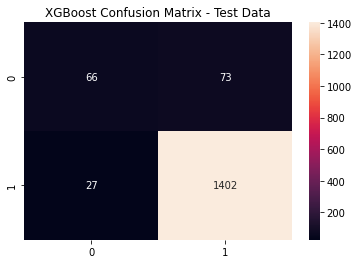

In [60]:
# Predicted Classes
xgb_pred = (xgb_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, xgb_pred)
xgb_cfm = metrics.confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cfm, annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix - Test Data')
plt.show()

In [61]:
xgb_met = pd.DataFrame(metrics.classification_report(y_test, xgb_pred, 
                                                     output_dict=True)).transpose()
xgb_met['model'] = 'XGBoost'
all_metrics = pd.concat([all_metrics, xgb_met.reset_index()], axis=0)
xgb_met

,precision,recall,f1-score,support,model
0,0.709677,0.474820,0.568966,139.000000,XGBoost
1,0.950508,0.981106,0.965565,1429.000000,XGBoost
accuracy,0.936224,0.936224,0.936224,0.936224,XGBoost
macro avg,0.830093,0.727963,0.767265,1568.000000,XGBoost
weighted avg,0.929159,0.936224,0.930407,1568.000000,XGBoost


### XGBoost - Threshold Tuning

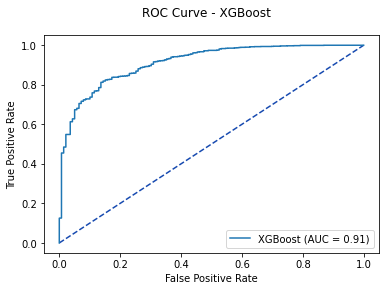

Optimal Threshold 0.995576


In [62]:
xgb_roc = metrics.roc_curve(y_test, xgb_pred_test[:, 1])
xgb_auc = metrics.auc(xgb_roc[0], xgb_roc[1])
xgb_plot = metrics.RocCurveDisplay(fpr=xgb_roc[0], tpr=xgb_roc[1], 
                                   roc_auc=xgb_auc, estimator_name='XGBoost')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - XGBoost')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
xgb_plot.plot(ax)
plt.show()

# Optimal Threshold value
xgb_opt = xgb_roc[2][np.argmax(xgb_roc[1] - xgb_roc[0])]

print('Optimal Threshold %f' % xgb_opt)

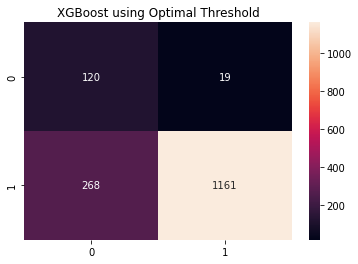

In [63]:
xgb_cfm = metrics.confusion_matrix(y_test, (xgb_pred_test[:, 1] >= xgb_opt).astype(int))
sns.heatmap(xgb_cfm, annot=True, fmt='g')
plt.title('XGBoost using Optimal Threshold')
plt.show()

In [64]:
pd.DataFrame(metrics.classification_report(y_test, 
                                           (xgb_pred >= xgb_opt).astype(int), 
                                           output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.709677,0.474820,0.568966,139.000000
1,0.950508,0.981106,0.965565,1429.000000
accuracy,0.936224,0.936224,0.936224,0.936224
macro avg,0.830093,0.727963,0.767265,1568.000000
weighted avg,0.929159,0.936224,0.930407,1568.000000


_________

## All Model Metrics

In [65]:
all_metrics.set_index(['model', 'index']).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th></th>\n      <th>precision</th>\n      <th>recall</th>\n      <th>f1-score</th>\n      <th>support</th>\n    </tr>\n    <tr>\n      <th>model</th>\n      <th>index</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th rowspan="5" valign="top">Baseline Model</th>\n      <th>0</th>\n      <td>0.000000</td>\n      <td>0.000000</td>\n      <td>0.000000</td>\n      <td>139.000000</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>0.911352</td>\n      <td>1.000000</td>\n      <td>0.953620</td>\n      <td>1429.000000</td>\n    </tr>\n    <tr>\n      <th>accuracy</th>\n      <td>0.911352</td>\n      <td>0.911352</td>\n      <td>0.911352</td>\n      <td>0.911352</td>\n    </tr>\n    <tr>\n      <th>macro avg</th>\n      <td>0.455676</td>\n      <td>0.500000</td>\n      <td>0.476810</td>\n      <td>1568.000

______

## Save Models

In [66]:
# save
with open('data/models/tlr.pkl','wb') as f:
    pickle.dump(tlr,f)

with open('data/models/svm.pkl','wb') as f:
    pickle.dump(svm,f)

with open('data/models/lda.pkl','wb') as f:
    pickle.dump(lda_model,f)

with open('data/models/qda.pkl','wb') as f:
    pickle.dump(qda_model,f)
    
with open('data/models/nb.pkl','wb') as f:
    pickle.dump(nb_model,f)

with open('data/models/dt.pkl','wb') as f:
    pickle.dump(dt,f)

with open('data/models/rf.pkl','wb') as f:
    pickle.dump(rf_model,f)
    
with open('data/models/xgb.pkl','wb') as f:
    pickle.dump(xgb_model,f)
